Business Problem


Our company now sees all the big companies creating original video content and We want to get in on the fun. We have decided to create a new movie studio, but we don’t know anything about creating movies. 
I'm charged with exploring what types of films are currently doing the best at the box office.
I must then translate those findings into actionable insights that the head of our company's new movie studio can use to help decide what type of films to create

In [5]:
#ooading libraries
import pandas as pd
from scipy.stats import pearsonr
import matplotlib as plt
import numpy as np
import sqlite3

In [96]:
df = pd.read_csv('tn.movie_budgets.csv.gz')
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [120]:
df1 = pd.read_csv('rt.movie_info.tsv.gz',  sep='\t')
df1.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [97]:
df2 = pd.read_csv('rt.reviews.tsv.gz', sep='\t', encoding='ISO-8859-1')
df2.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [99]:
df3 = pd.read_csv('tmdb.movies.csv.gz')
df3.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [60]:
conn = sqlite3.Connection("im.db/im.db")


In [98]:
qo = """
SELECT *
FROM sqlite_master
;
"""
pd.read_sql(qo, conn)


,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [46]:
qo = """
SELECT *
FROM movie_basics
;
"""
pd.read_sql(qo, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


1. CLEANING DATA

In [94]:
df.isnull().sum()
print(df.describe())
print(df.info())
print(df.duplicated())

                id
count  5782.000000
mean     50.372363
std      28.821076
min       1.000000
25%      25.000000
50%      50.000000
75%      75.000000
max     100.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None
0       False
1       False
2       False
3       False
4       False
        ...  
5777    False
5778    False
5779    False
5780    False
5781    False
Length: 5782, dtype: bool


In [179]:
df1 
print(df1.isnull().sum()) 
print(df1.describe())
print(df1.info())

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64
                id
count  1560.000000
mean   1007.303846
std     579.164527
min       1.000000
25%     504.750000
50%    1007.500000
75%    1503.250000
max    2000.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    ob

In [160]:
df2
print(df2.isnull().sum())
print(df2.describe())
print(df2.info())

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64
                 id    top_critic
count  54432.000000  54432.000000
mean    1045.706882      0.240594
std      586.657046      0.427448
min        3.000000      0.000000
25%      542.000000      0.000000
50%     1083.000000      0.000000
75%     1541.000000      0.000000
max     2000.000000      1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64

In [161]:
df3
print(df3.isnull().sum())
print(df3.describe())
print(df3.info())

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64
        Unnamed: 0             id    popularity  \
count  26517.00000   26517.000000  26517.000000   
mean   13258.00000  295050.153260      2.578497   
min        0.00000      27.000000      0.000000   
25%     6629.00000  157851.000000      0.000000   
50%    13258.00000  309581.000000      1.000000   
75%    19887.00000  419542.000000      3.000000   
max    26516.00000  608444.000000     80.000000   
std     7654.94288  153661.615648      4.395747   

                        release_date  vote_average    vote_count  
count                          26517  26517.000000  26517.000000  
mean   2014-06-10 02:50:14.730173184      5.991281    194.224837  
min              1930-04-29 00:00:00      0.000000      1.000000  
25%              2012-06-29 0

In [111]:
df1.dropna(inplace=True)

In [87]:
df2 = df2.dropna(subset=['review'])

dropping the review column as its not relevant as a categorical variable

In [91]:
df2['date'] = pd.to_datetime(df2['date'])

In [94]:
df3['release_date'] = pd.to_datetime(df3['release_date'])

In [100]:
df1['theater_date'] = pd.to_datetime(df1['theater_date'])

In [102]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [132]:
df2['rating'] = df2['rating'].astype(str)
df2['rating'] = pd.to_numeric(df2['rating'].str[0], errors='coerce')
df2['rating'].fillna(0, inplace=True)  # Replace NaN with 0

In [139]:
df2.dropna(subset=['publisher'], inplace=True)

In [143]:
df2.drop(columns=['critic'], inplace=True)

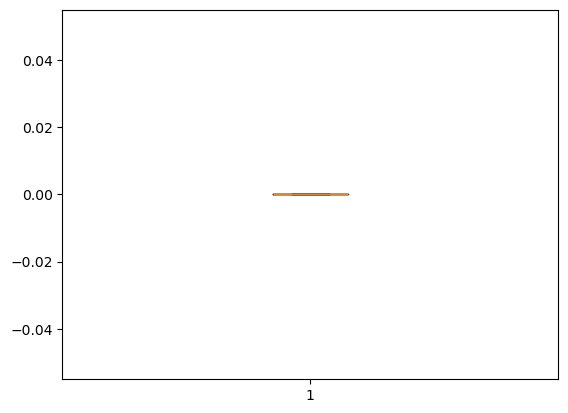

In [152]:
import matplotlib.pyplot as plt
 
# Creating plot
plt.boxplot(df2['rating'])
 
# show plot
plt.show()

In [24]:
df3['original_language'].tail()

26512    en
26513    en
26514    en
26515    en
26516    en
Name: original_language, dtype: object

In [160]:
df3['popularity'] = df3['popularity'].astype(int)
df3['popularity'] = pd.to_numeric(df3['popularity'], errors='coerce').fillna(0).astype(int)

<Axes: >

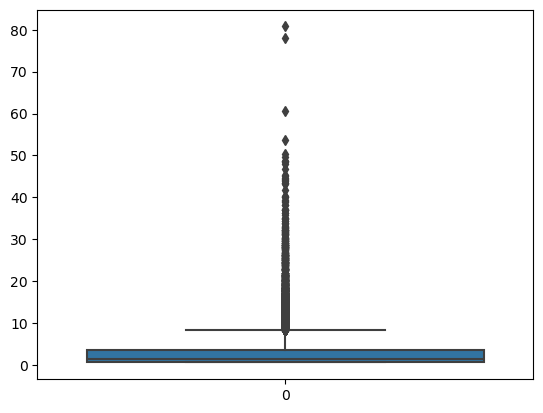

In [125]:
#checking outliers
import seaborn as sns
sns.boxplot(df3['popularity'])

In [182]:
df1['runtime'] = df1['runtime'].str.extract('(\d+)')  # Extract numeric part
df1['runtime'] = pd.to_numeric(df1['runtime'], errors='coerce')  # Convert to numeric, invalid parsing will be set as NaN

# Fill NaN values with 0 or any appropriate value
df1['runtime'] = df1['runtime'].fillna(0).astype(int)

In [243]:
runtime_mean = df1['runtime'].mean()

The average mean runtime is 102 minutes which affects the viewers attention span

The average gives us the mean of the vote average to get the most average and high voted movies

In [116]:
language_counts = df3['original_language'].value_counts()

# Find the most used language
most_used_language = language_counts.idxmax()
least_used_langauge = language_counts.idxmin()
print(most_used_language)
print(least_used_langauge)

en
ha


We got the movies languages to get The most used language in movies is English while the least is ha

In [115]:
rating_counts = df1['rating'].value_counts()
most_ratings = rating_counts.idxmax()
least_ratings = rating_counts.idxmin()
print(most_ratings)
print(least_ratings)

R
NC17


We got the most ratings which most people used which is R moves and the least ratings is NC17

In [114]:
genre_counts = df1['genre'].value_counts()
most_counts = genre_counts.idxmax()
least_counts = genre_counts.idxmin()
print(most_counts)
print(least_counts)

Drama
Science Fiction and Fantasy


We got the genre produced  which is Drama and least being science fiction and fantasy




In [113]:
runtime_counts = df1['runtime'].value_counts()
most_counts = runtime_counts.idxmax()
least_counts = runtime_counts.idxmin()
print(most_counts)
print(least_counts)

91 minutes
138 minutes


The most movies runtime is 90 minutes, while the least being 64 minutes 

In [55]:
qo = """
SELECT *
FROM movie_ratings
;
"""
pd.read_sql(qo, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [63]:
qo = """
SELECT AVG(averagerating) AS average
FROM movie_ratings
;
"""
pd.read_sql(qo, conn)

,average
0,6.332729


In [79]:
qo = """SELECT genres, COUNT(*) AS movie_count
FROM movie_basics
GROUP BY genres
ORDER BY movie_count DESC
LIMIT 1
;
"""
pd.read_sql(qo, conn)

,genres,movie_count
0,Documentary,32185


MAXIMUM GENRES PRODUCED

In [80]:
qo = """SELECT genres, COUNT(*) AS movie_count
FROM movie_basics
GROUP BY genres
ORDER BY movie_count ASC
LIMIT 1;
"""
pd.read_sql(qo, conn)



,genres,movie_count
0,"Action,Adventure,Musical",1


LEAST PRODUCED GENRES

In [81]:
qo = """WITH genre_counts AS (
    SELECT genres, COUNT(*) AS movie_count
    FROM movie_basics
    GROUP BY genres
)
SELECT genres, movie_count
FROM genre_counts
WHERE movie_count = (SELECT MAX(movie_count) FROM genre_counts)
UNION ALL
SELECT genres, movie_count
FROM genre_counts
WHERE movie_count = (SELECT MIN(movie_count) FROM genre_counts);
"""
pd.read_sql(qo, conn)


,genres,movie_count
0,Documentary,32185
1,"Action,Adventure,Musical",1
2,"Action,Animation,Biography",1
3,"Action,Animation,Documentary",1
4,"Action,Animation,History",1
...,...,...
231,"Short,Thriller",1
232,"Sport,Talk-Show",1
233,"Sport,Thriller",1
234,"Thriller,War,Western",1


In [82]:
qo = """SELECT movie_basics.genres, AVG(movie_ratings.averagerating) AS average_rating
FROM movie_basics
JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
GROUP BY movie_basics.genres
ORDER BY average_rating DESC
LIMIT 1;
"""
pd.read_sql(qo, conn)



,genres,average_rating
0,"Comedy,Documentary,Fantasy",9.4


MOST POPULAR GENRE BY AVERAGE RATING

In [84]:
qo = """SELECT movie_basics.genres, AVG(movie_ratings.averagerating) AS average_rating, SUM(movie_ratings.numvotes) AS total_votes
FROM movie_basics
JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
GROUP BY movie_basics.genres
ORDER BY average_rating DESC, total_votes DESC
LIMIT 10;
"""
pd.read_sql(qo, conn)


,genres,average_rating,total_votes
0,"Comedy,Documentary,Fantasy",9.4,5
1,"Documentary,Family,Musical",9.3,19
2,"History,Sport",9.2,5
3,Game-Show,9.0,7
4,"Music,Mystery",9.0,5
5,"Documentary,News,Sport",8.8,25
6,"Drama,Fantasy,War",8.8,22
7,"Comedy,Drama,Reality-TV",8.8,15
8,"Documentary,News,Reality-TV",8.8,8
9,"Drama,Short",8.8,8


In [85]:
qo = """SELECT movie_basics.genres, AVG(movie_ratings.averagerating) AS average_rating
FROM movie_basics
JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
GROUP BY movie_basics.genres
ORDER BY average_rating ASC
LIMIT 1;

"""
pd.read_sql(qo, conn)

,genres,average_rating
0,"Comedy,Musical,Sport",1.4


LEAST GENRE BY AVERAGE RATING

In [86]:
o = """SELECT movie_basics.genres, AVG(movie_ratings.averagerating) AS average_rating, SUM(movie_ratings.numvotes) AS total_votes
FROM movie_basics
JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
GROUP BY movie_basics.genres
ORDER BY average_rating ASC, total_votes DESC;

"""
pd.read_sql(qo, conn)


,genres,average_rating
0,"Comedy,Musical,Sport",1.4


FIND BEST FIT AND PLOT TO FIND RELATIONSHIP WITH rating, genre, director, writer, runtime      studio

rating,   original_language,  vote_average  ,vote_count , original_language

POPULARITY IN THE MARKET
1. We got the movies languages to get The most used language in movies is English while the least is ha
2. R
NC17
We got the most ratings which most people used which is R moves and the least ratings is NC
3. Drama
Science Fiction and Fantasy
We got the genre produced which is Drama and least being comedy musical and performing ar
4. Clint Eastwood
Kevin Smith
DIRECTOR WITH THE MOST AND LEAST PRODUCED MOVI
5. 101.96858974358975
The average mean runtime is 102 minutes which affects the viewers attention spanESts17

In [119]:
director = df1['director'].value_counts()
most_counts = director.idxmax()
least_counts = director.idxmin()
print(most_counts)
print(least_counts)

Clint Eastwood
Kevin Smith


DIRECTOR WITH THE MOST AND LEAST PRODUCED MOVIES

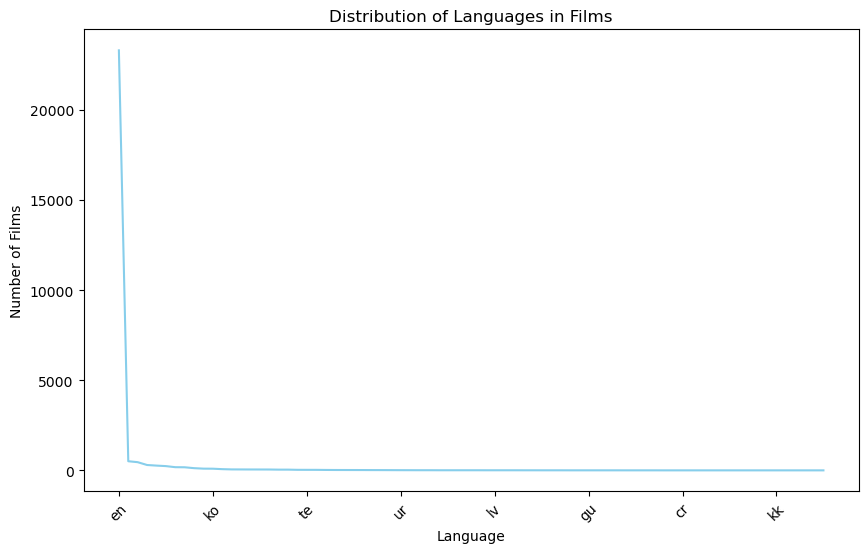

In [238]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
language_counts.plot(kind='line', color='skyblue')
plt.title('Distribution of Languages in Films')
plt.xlabel('Language')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.savefig('languages.png', dpi=300, bbox_inches='tight')
plt.show()

Market Trends:

Most Used Language: This indicates the language most commonly used in films, which might suggest a dominant market or audience preference. , English is the most used language, it  means that films in English dominate the industry, possibly due to larger global reach or higher production volume.


Recommendation: Consider the language trends when planning content. If the most used language is prevalent, the studio might want to focus on producing content in that language to reach a wider audience. Conversely, the least used language could represent an opportunity to tap into a niche market.
Language Strategy:

Focus on producing movies in English to cater to the largest audience base.
Explore niche markets by creating content in less common languages like Hausa, which could have untapped potential.

In [139]:
pop = df3['popularity'].mean()


3.130912244974922

In [142]:
vote_mean = df3['vote_average'].mean()
vote_mean

5.991281064977184

In [161]:
cleaned = df2.dropna(inplace = True)

In [165]:
conn.close()

In [167]:
df.to_csv('tn.movie_budgets.csv.gz', index=False)


In [168]:
df1.to_csv('rt.movie_info.tsv.gz', index=False)


In [ ]:
df2.to_csv('rt.movie_info.tsv.gz', index=False)

In [169]:
df3.to_csv('tmdb.movies.csv.gz', index=False)

In [173]:
mean = df3['vote_average'].mean()

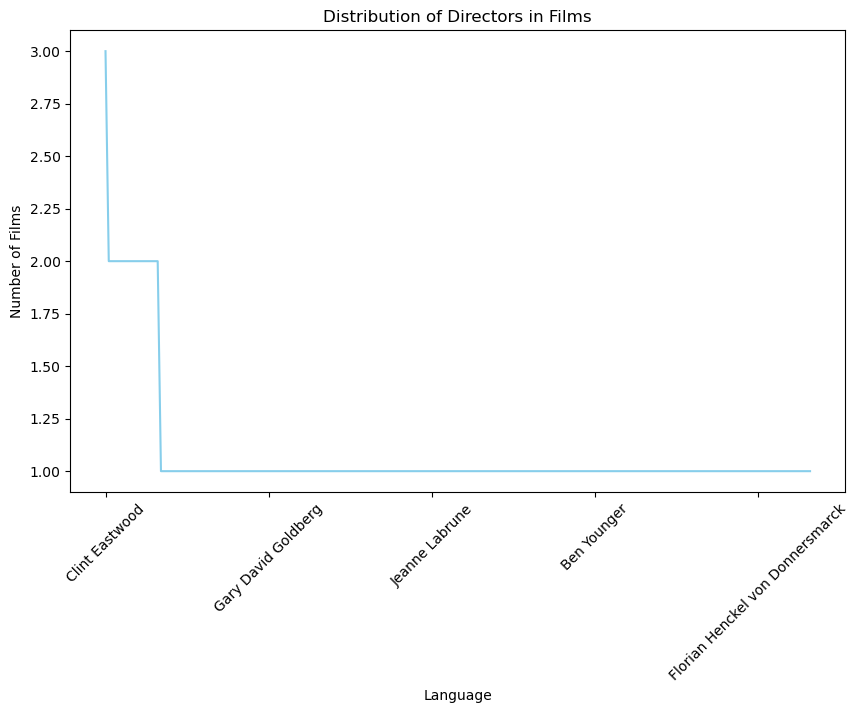

In [239]:
plt.figure(figsize=(10, 6))
director.plot(kind='line', color='skyblue')
plt.title('Distribution of Directors in Films')
plt.xlabel('Language')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.savefig('director.png', dpi=300, bbox_inches='tight')
plt.show()

Collaborate with directors like Clint Eastwood who have a proven track record of producing successful movies.
Give opportunities to directors like Kevin Smith to bring fresh and unique perspectives to the studio's portfolio.

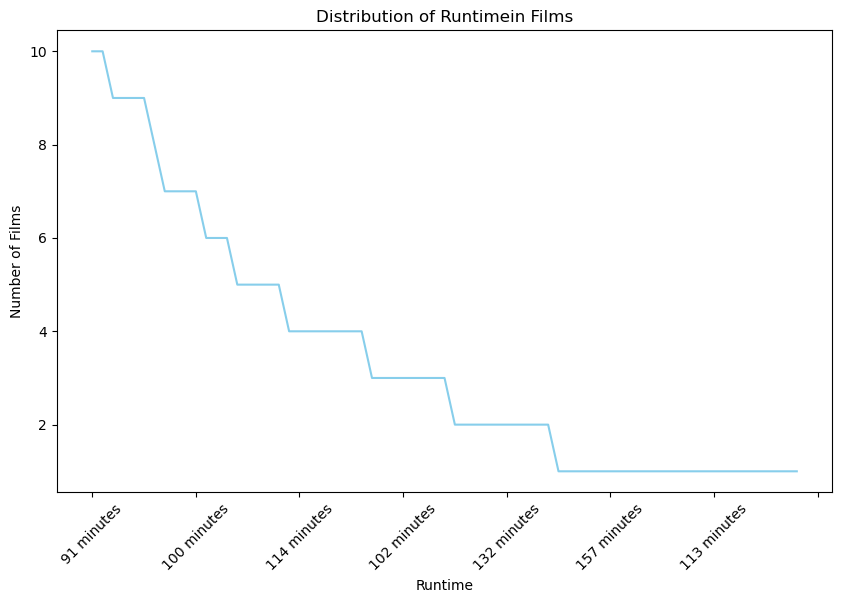

In [240]:
plt.figure(figsize=(10, 6))
runtime_counts.plot(kind='line', color='skyblue')
plt.title('Distribution of Runtimein Films')
plt.xlabel('Runtime')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.savefig('runtime.png', dpi=300, bbox_inches='tight')
plt.show()

Aim to produce movies with runtimes around 102 minutes to maintain viewer engagement without causing fatigue.
Consider the genre and target audience when deciding on the movie length to optimize viewer satisfaction.

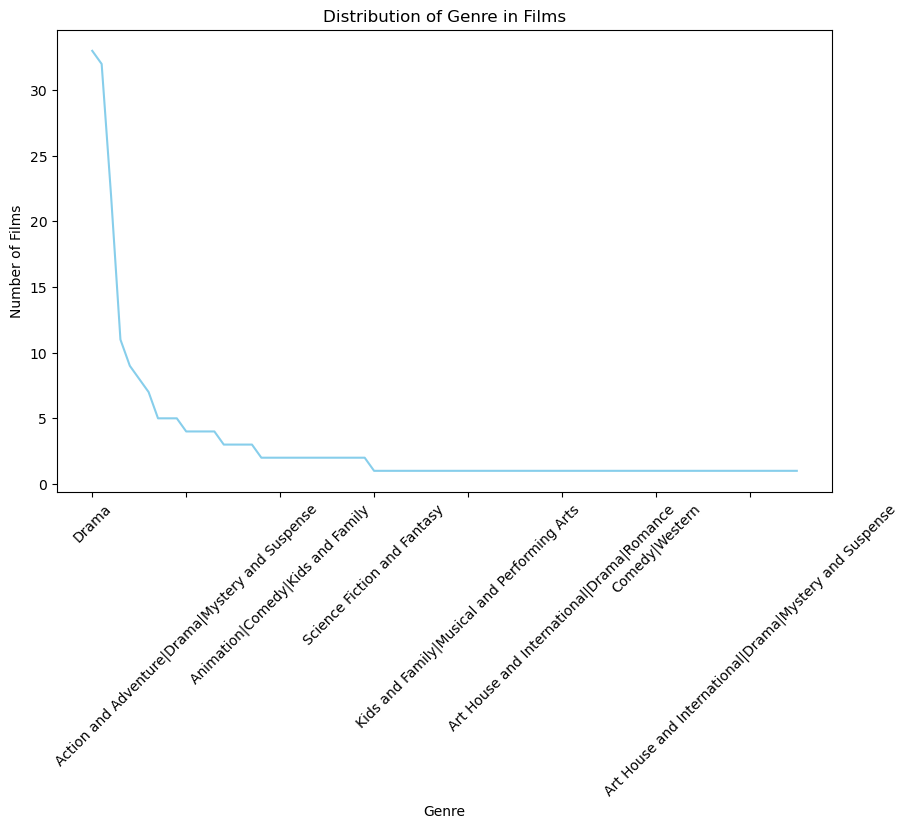

In [241]:
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='line', color='skyblue')
plt.title('Distribution of Genre in Films')
plt.xlabel('Genre')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.savefig('genre.png', dpi=300, bbox_inches='tight')
plt.show()

Continue to produce Drama movies as they are the most popular genre.
Experiment with Comedy, Musical, and Performing Arts genres to diversify offerings and attract different audience segments.

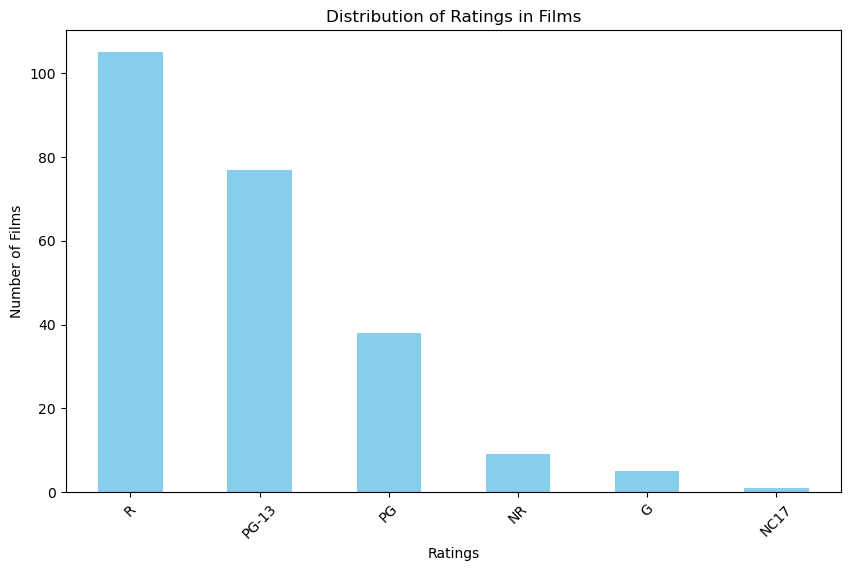

In [242]:
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings in Films')
plt.xlabel('Ratings')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.savefig('rating.png', dpi=300, bbox_inches='tight')
plt.show()

Invest in producing R-rated movies as they have the highest audience demand.
Consider the potential market for NC-17 rated movies, but be cautious due to their limited audience.